# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Rifa Khaira Fazila
- **Email:** rifa.kf@gmail.com
- **ID Dicoding:** Rifa Khaira Fazila

## Menentukan Pertanyaan Bisnis

- Pada hari apa rental sepeda paling ramai ?
- Pada jam berapa rental sepeda paling ramai ?

## Import Semua Packages/Library yang Digunakan

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memanggil data day.csv

In [166]:
day_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analisis Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memanggil data hour.csv

In [167]:
hour_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analisis Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- File day.csv berisi data rental sepeda per hari
- File hour.csv berisi data rental sepeda per jam

### Assessing Data

Melihat jumlah, rata-rata, min, dan lainnya pada day_df

In [168]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [169]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek duplikasi pada day_df

In [170]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melihat jumlah. rata-rata, min, dan lainnya pada hour_df

In [171]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [172]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Cek duplikasi pada hour_df

In [173]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Baik day_df dan hour_df tidak ada duplicate dan missing value
- "dteday" masih berupa object

### Cleaning Data

In [174]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memperbaiki data pada day_df

In [175]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [176]:
day_df = day_df.drop(["yr", "instant", "holiday", "workingday"], axis=1)

In [177]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   mnth        731 non-null    int64         
 3   weekday     731 non-null    int64         
 4   weathersit  731 non-null    int64         
 5   temp        731 non-null    float64       
 6   atemp       731 non-null    float64       
 7   hum         731 non-null    float64       
 8   windspeed   731 non-null    float64       
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 68.7 KB


In [178]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memperbaiki data pada hour_df

In [179]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [180]:
hour_df = hour_df.drop(["yr", "instant", "holiday", "workingday"], axis=1)

In [181]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   mnth        17379 non-null  int64         
 3   hr          17379 non-null  int64         
 4   weekday     17379 non-null  int64         
 5   weathersit  17379 non-null  int64         
 6   temp        17379 non-null  float64       
 7   atemp       17379 non-null  float64       
 8   hum         17379 non-null  float64       
 9   windspeed   17379 non-null  float64       
 10  casual      17379 non-null  int64         
 11  registered  17379 non-null  int64         
 12  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 1.7 MB


**Insight:**
- Tipe data "dteday" pada day_df dan hour_df telah diubah
- Menghapus variabel yr, instant, holiday, dan workingday

## Exploratory Data Analysis (EDA)

### Explore ...

Mengeksplor data day_df

In [182]:
day_df.describe()

,dteday,season,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,6.519836,2.997264,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,4.000000,1.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,7.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,10.000000,5.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,12.000000,6.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,3.451913,2.004787,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [183]:
day_df_weekday = day_df.groupby(by=["weekday"]).agg({"casual": "mean","registered": "mean","cnt": "mean"})
print(day_df_weekday.to_string())

              casual   registered          cnt
weekday                                       
0        1338.295238  2890.533333  4228.828571
1         674.133333  3663.990476  4338.123810
2         556.182692  3954.480769  4510.663462
3         551.144231  3997.394231  4548.538462
4         590.961538  4076.298077  4667.259615
5         752.288462  3938.000000  4690.288462
6        1465.257143  3085.285714  4550.542857


In [184]:
day_df_month = day_df.groupby(by=["mnth" ,"weekday"]).agg({"casual": "mean","registered": "mean","cnt": "mean"})
print(day_df_month.to_string())
day_df_month = day_df_month.reset_index()

                   casual   registered          cnt
mnth weekday                                       
1    0         304.900000  1511.000000  1815.900000
     1         124.400000  1802.400000  1926.800000
     2         166.444444  2401.333333  2567.777778
     3         122.750000  2015.875000  2138.625000
     4         125.875000  2387.375000  2513.250000
     5         147.500000  2299.000000  2446.500000
     6         342.444444  1614.111111  1956.555556
2    0         451.000000  1796.500000  2247.500000
     1         207.375000  2397.000000  2604.375000
     2         131.375000  2692.625000  2824.000000
     3         166.111111  2647.222222  2813.333333
     4         176.250000  2702.250000  2878.500000
     5         258.500000  2674.625000  2933.125000
     6         459.000000  1807.500000  2266.500000
3    0        1090.250000  2210.750000  3301.000000
     1         505.500000  3040.125000  3545.625000
     2         453.777778  3120.222222  3574.000000
     3      

Mengeksplor data hour_df

In [185]:
hour_df.describe()

,dteday,season,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,6.537775,11.546752,3.003683,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,4.000000,6.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,7.000000,12.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,10.000000,18.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,12.000000,23.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,3.438776,6.914405,2.005771,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [186]:
hour_df.groupby(by="hr").agg({"cnt": "mean",})

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [187]:
hour_df_weather = hour_df.groupby(by=["hr", "weathersit"]).agg({"cnt": "mean"})
print(hour_df_weather.to_string())
hour_df_weather = hour_df_weather.reset_index()

                      cnt
hr weathersit            
0  1            59.161554
   2            47.232432
   3            28.115385
1  1            34.395918
   2            35.541899
   3            17.129630
   4            23.000000
2  1            22.817992
   2            25.491713
   3            14.839286
3  1            11.995604
   2            12.452128
   3             6.944444
4  1             6.413567
   2             6.721311
   3             4.684211
5  1            20.414687
   2            20.141463
   3            13.877551
6  1            79.165563
   2            74.612903
   3            55.981818
7  1           218.742664
   2           224.733645
   3           131.071429
8  1           361.359091
   2           391.283843
   3           213.775862
9  1           226.391608
   2           226.848361
   3           128.981481
10 1           192.470721
   2           159.469565
   3            77.773585
11 1           234.284116
   2           182.678112
   3        

**Insight:**
1. Untuk data day_df

a. Rata-rata rental sepeda paling ramai :
- Rata-rata rental sepeda paling ramai oleh perental sepeda "casual" adalah di hari sabtu
- Rata-rata rental sepeda paling ramai oleh perental sepeda "registered" adalah di hari kamis
- Rata-rata rental sepeda paling ramai oleh total perental sepeda "cnt" adalah di hari jumat

b. Rata-rata rental sepeda paling ramai berdasarkan hari dan bulan oleh total perental sepeda "cnt" :
- Januari : paling banyak di hari selasa
- Februari : paling banyak di hari jumat
- Maret : paling banyak di hari sabtu
- April : paling banyak di hari kamis
- Mei : paling banyak di hari sabtu
- Juni : paling banyak di hari sabtu
- Juli : paling banyak di hari selasa
- Agustus : paling banyak di hari rabu
- September : paling banyak di hari sabtu
- Oktober : paling banyak di hari jumat
- November : paling banyak di hari senin
- Desember : paling banyak di hari jumat

2. Untuk data hour_df

a. Rata-rata merental sepeda paling ramai terjadi pada pukul 17.00

b. Rata-rata merental sepeda paling ramai berdasarkan jam dan cuaca:
- Rata-rata merental sepeda paling ramai di jam 17.00 pada cuaca "clear"


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa rental sepeda paling ramai digunakan ?

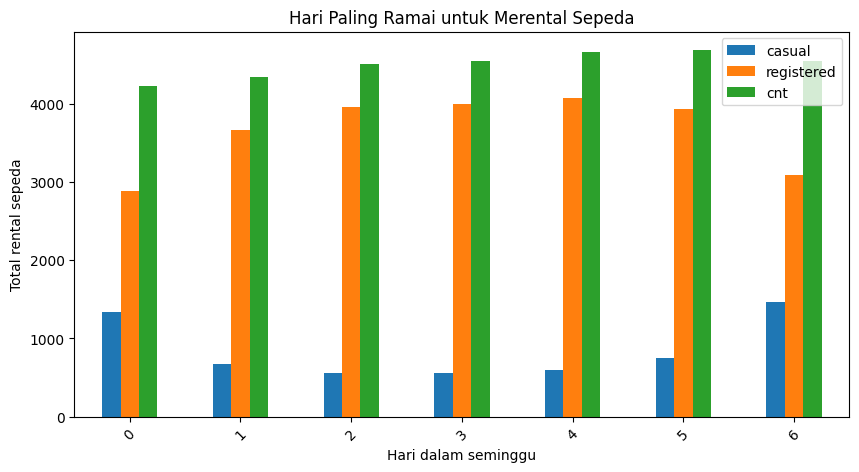

In [192]:
day_df_weekday.plot(kind="bar", figsize=(10,5))
plt.xlabel("Hari dalam seminggu")
plt.xticks(rotation=45)
plt.ylabel("Total rental sepeda")
plt.title("Hari Paling Ramai untuk Merental Sepeda")
plt.show()

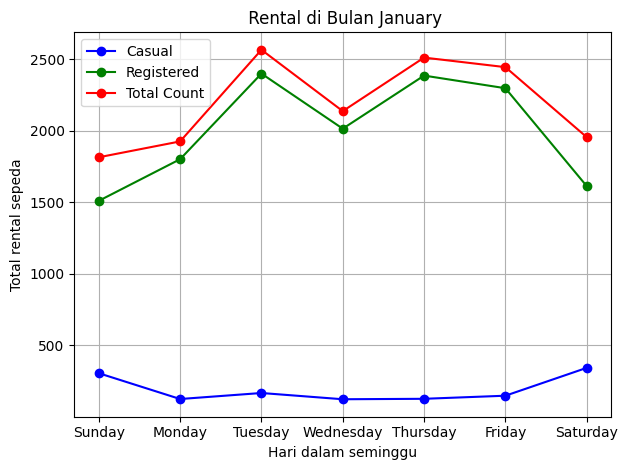

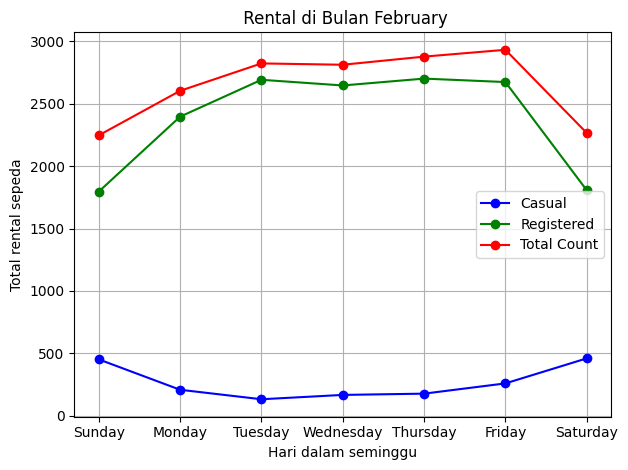

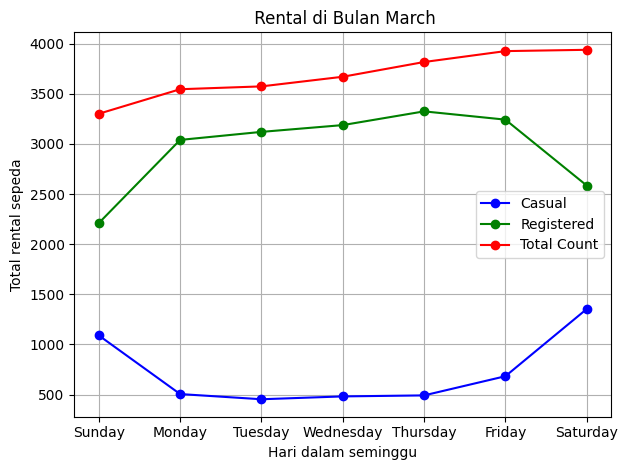

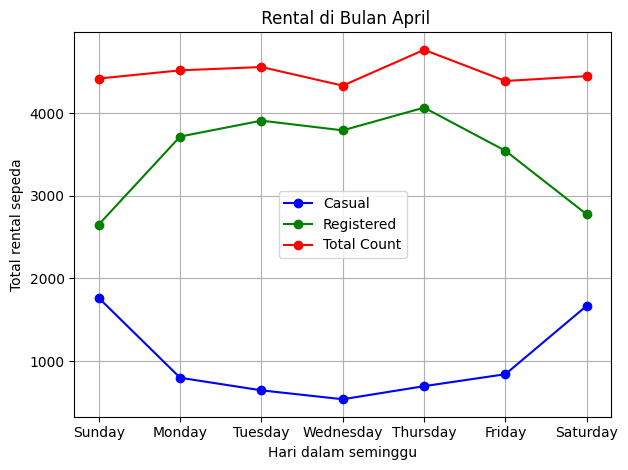

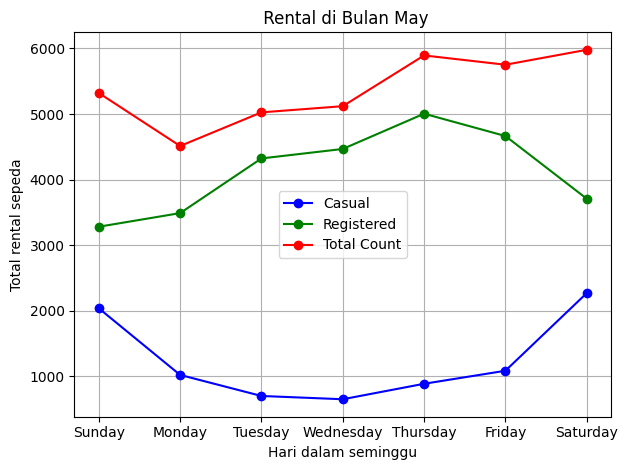

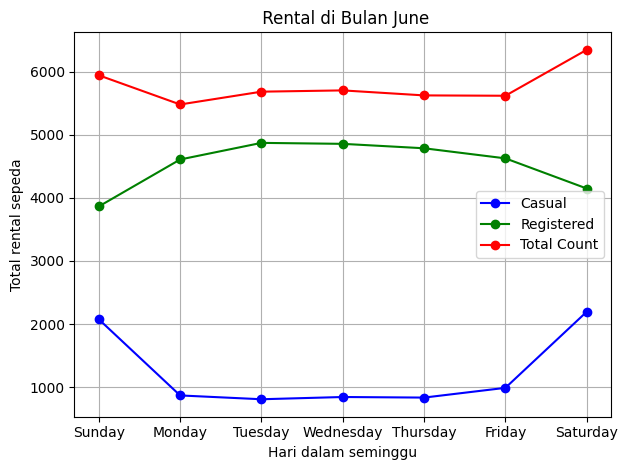

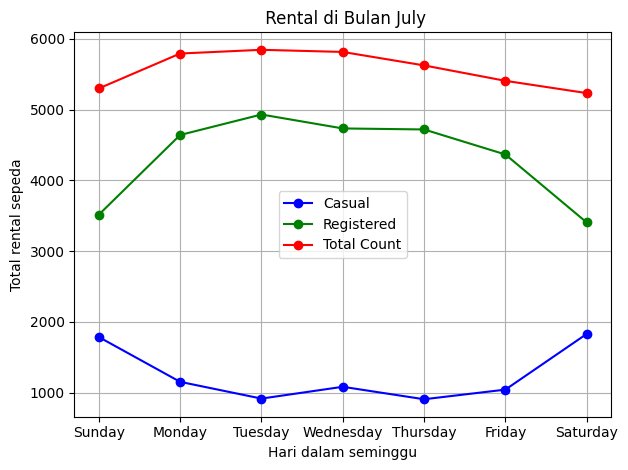

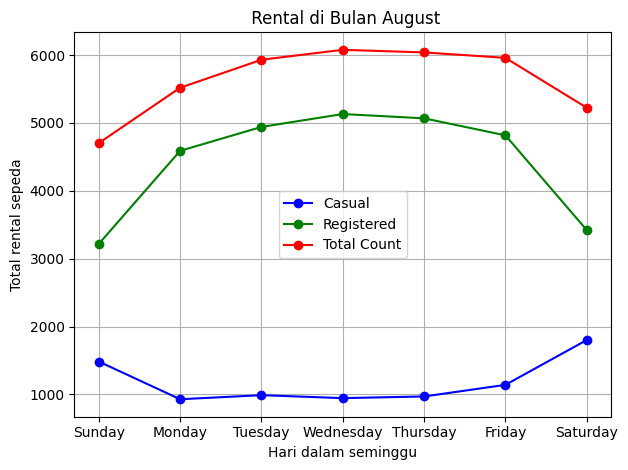

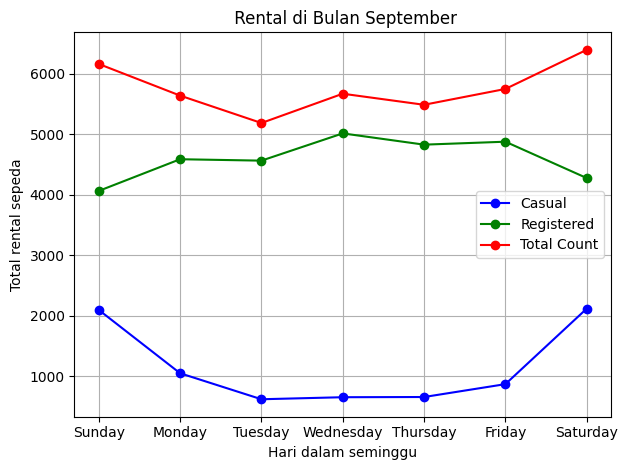

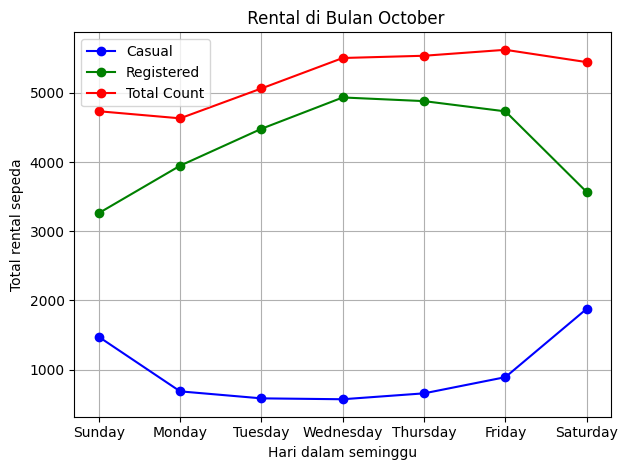

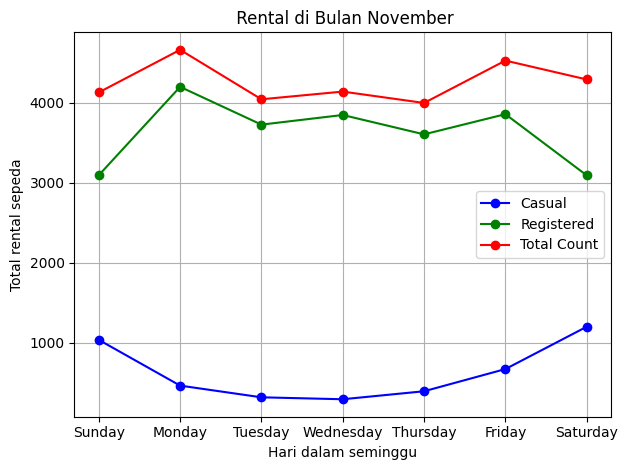

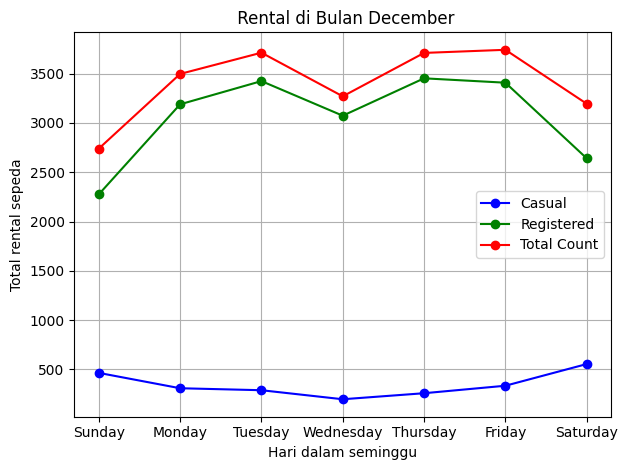

In [198]:
months_order = [ "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
weekdays_order = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

for index, month in enumerate(months_order):
  monthly_data = day_df_month[day_df_month["mnth"] == index + 1]

  plt.plot(weekdays_order, monthly_data.casual, label="Casual", marker="o", color="blue")
  plt.plot(weekdays_order, monthly_data.registered, label="Registered", marker="o", color="green")
  plt.plot(weekdays_order, monthly_data.cnt, label="Total Count", marker="o", color="red")


  plt.title(f" Rental di Bulan {month}")
  plt.xlabel("Hari dalam seminggu")
  plt.ylabel("Total rental sepeda")
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

### Pertanyaan 2: Pada jam berapa rental sepeda paling ramai digunakan ?

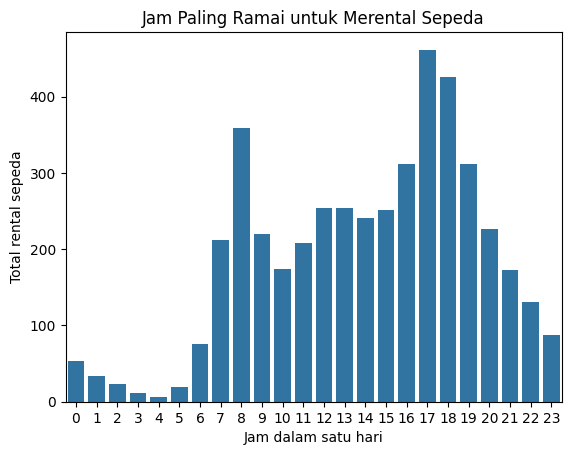

In [202]:
hour_df = hour_df.groupby(by=["hr"]).agg({"casual": "mean","registered": "mean","cnt": "mean"})
sns.barplot(data=hour_df, x="hr", y="cnt")
plt.xticks(ticks=range(24), labels=range(24))
plt.xlabel("Jam dalam satu hari")
plt.ylabel("Total rental sepeda")
plt.title("Jam Paling Ramai untuk Merental Sepeda")
plt.show()

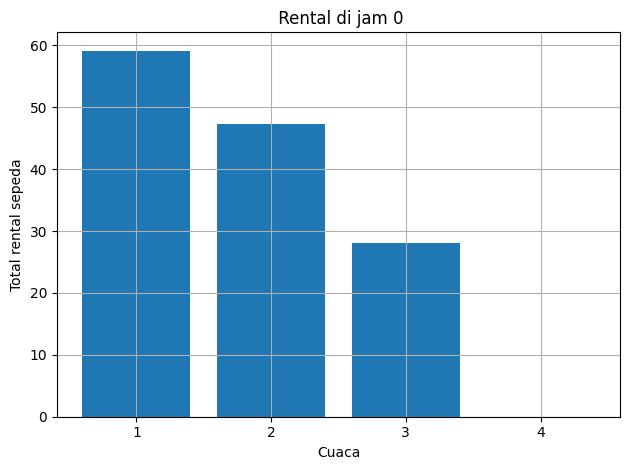

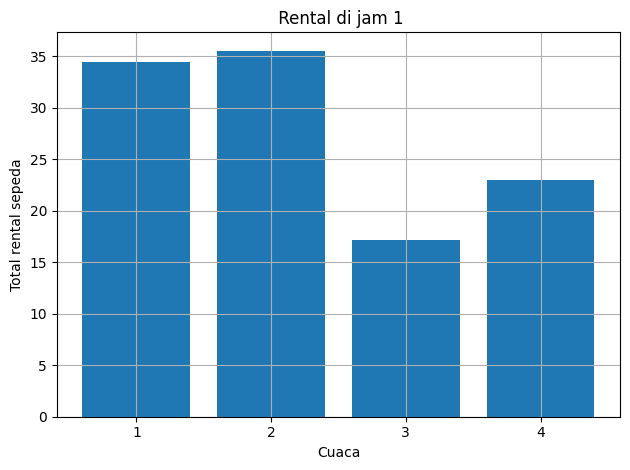

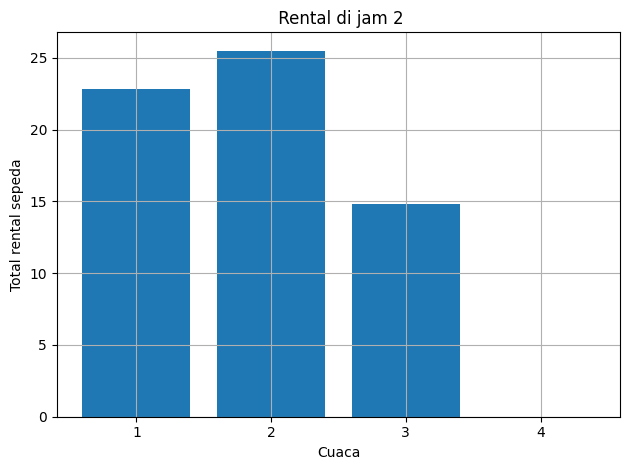

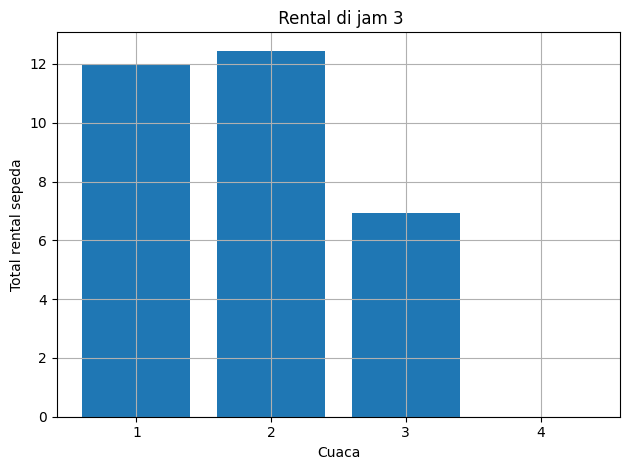

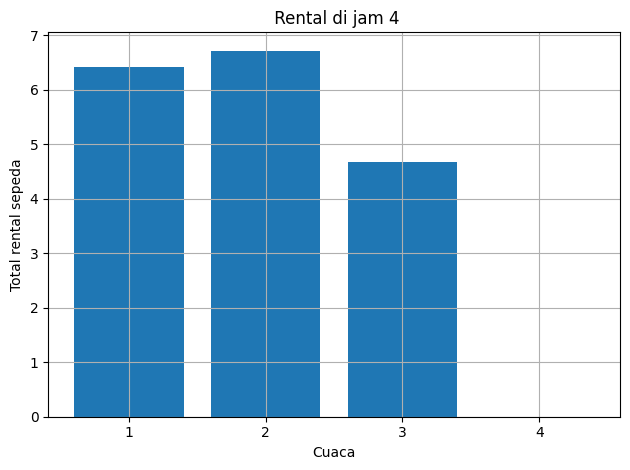

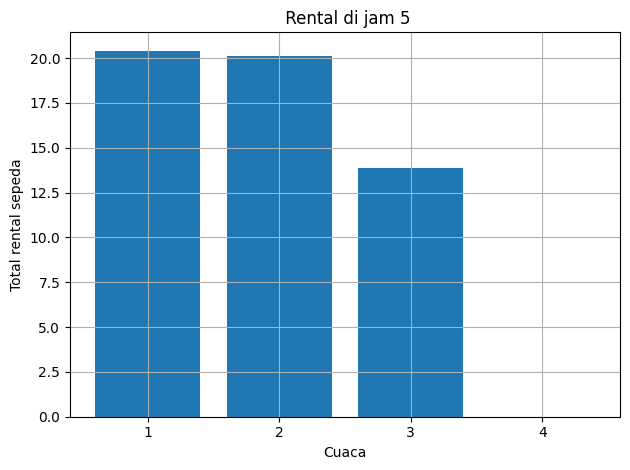

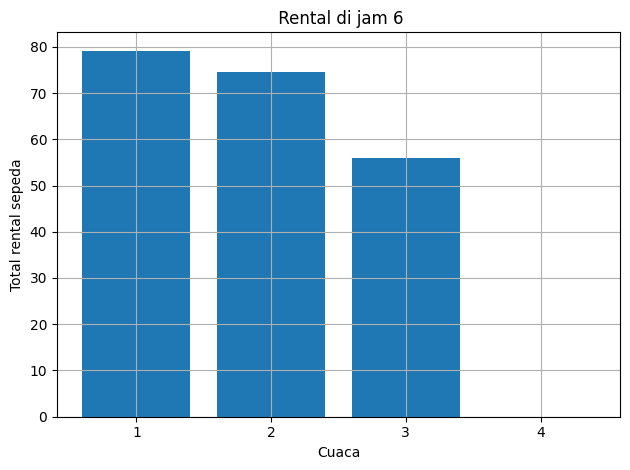

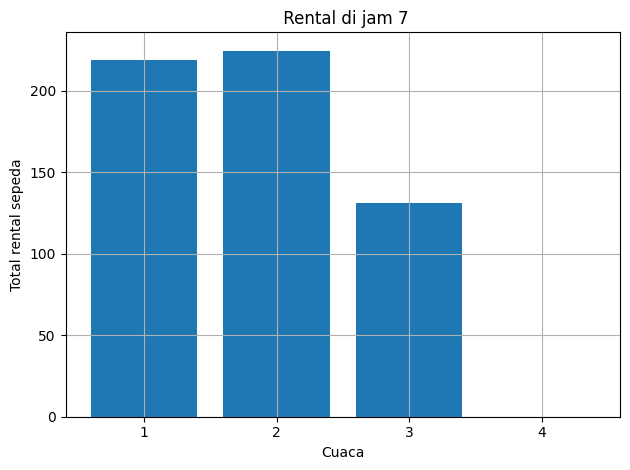

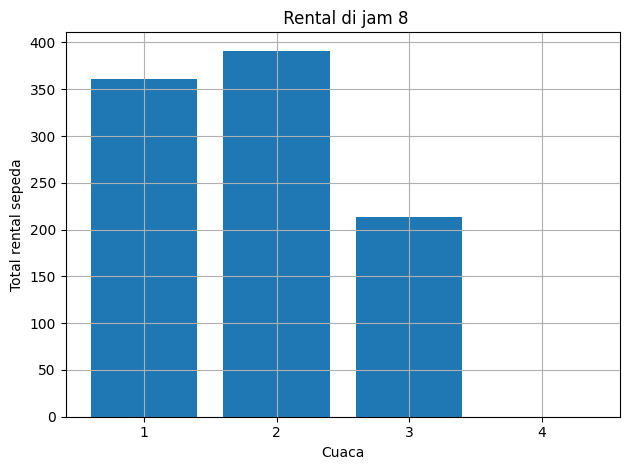

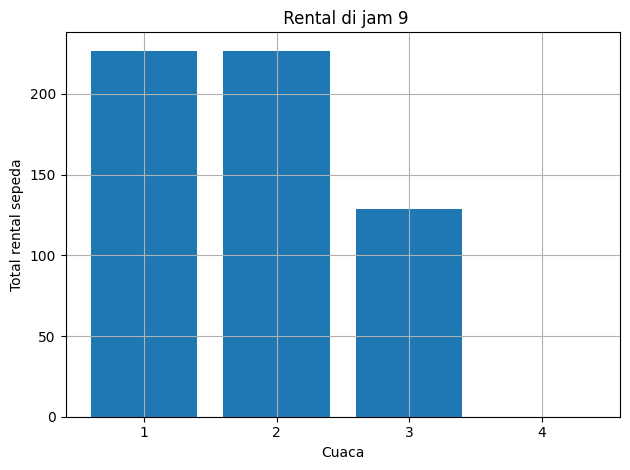

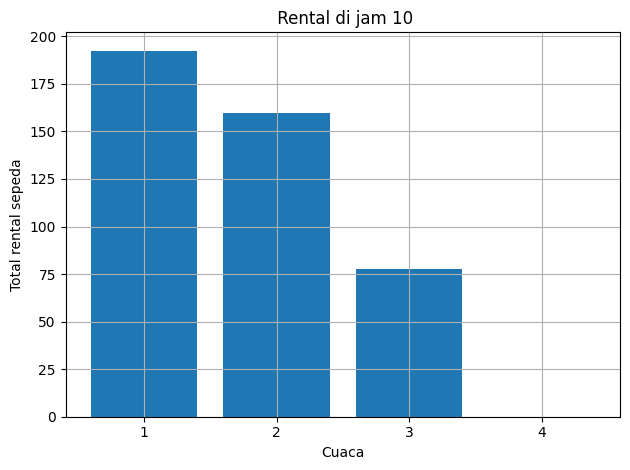

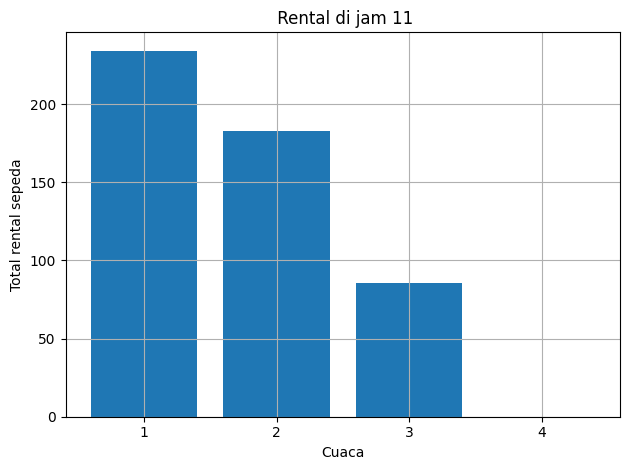

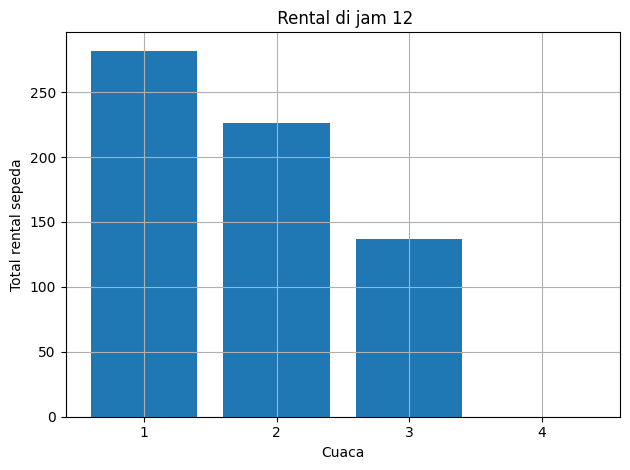

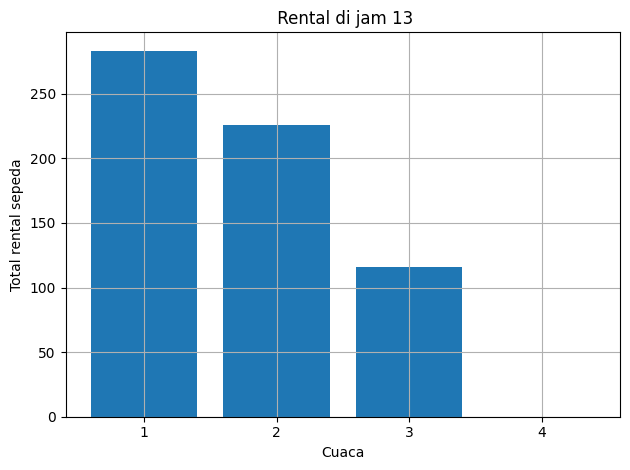

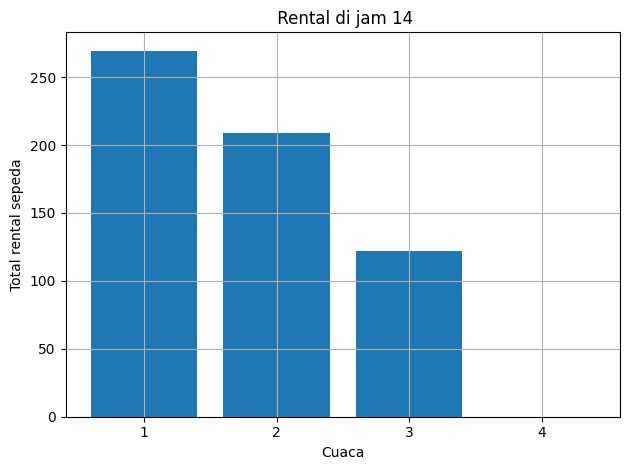

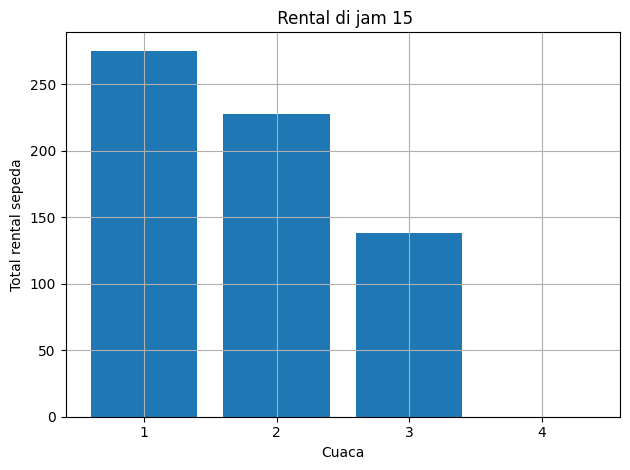

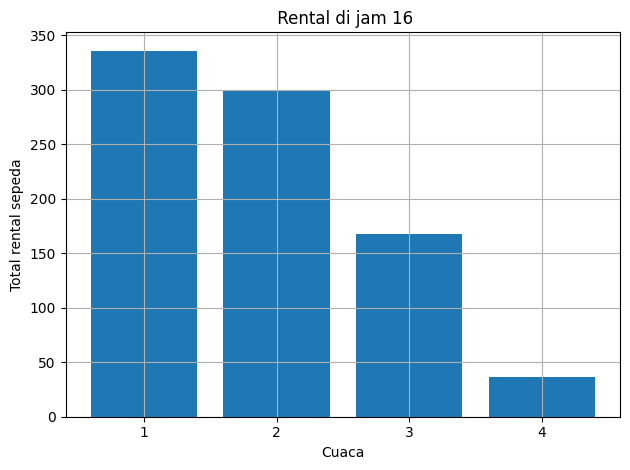

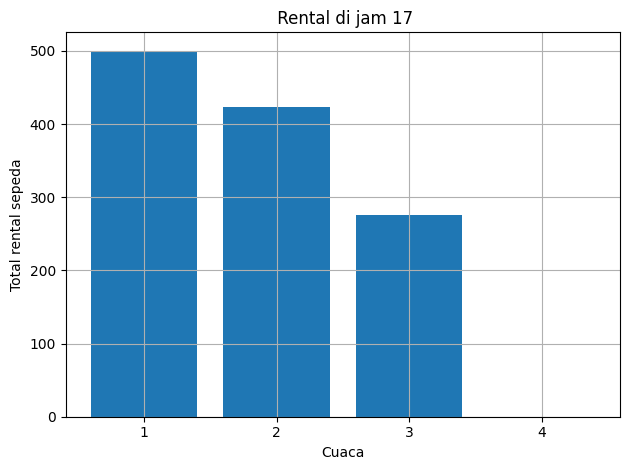

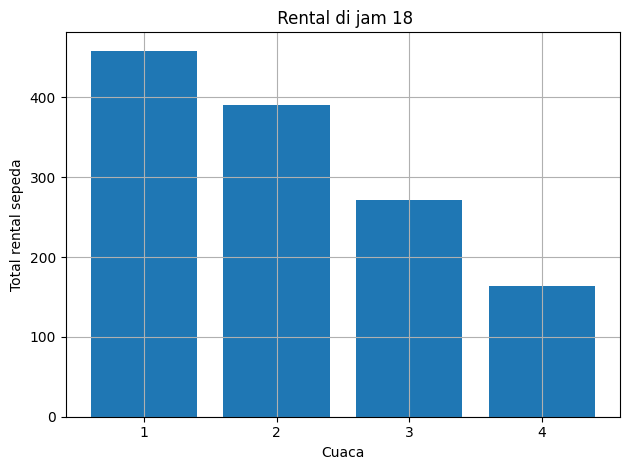

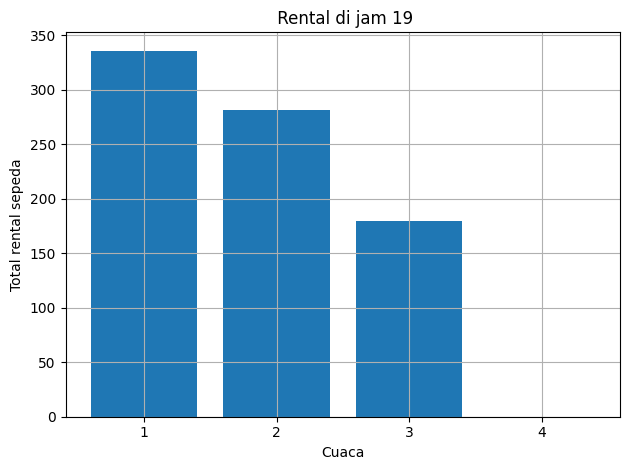

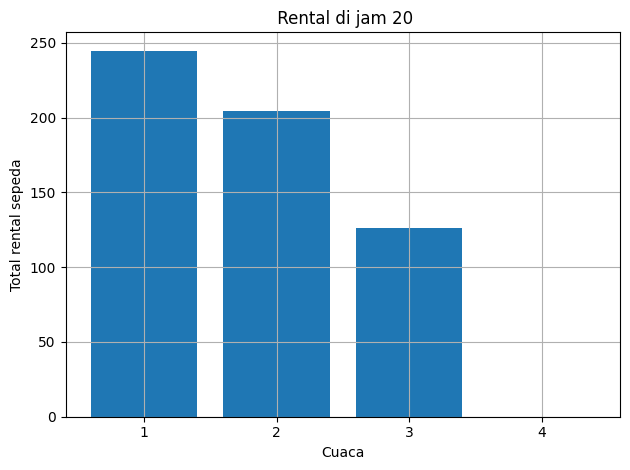

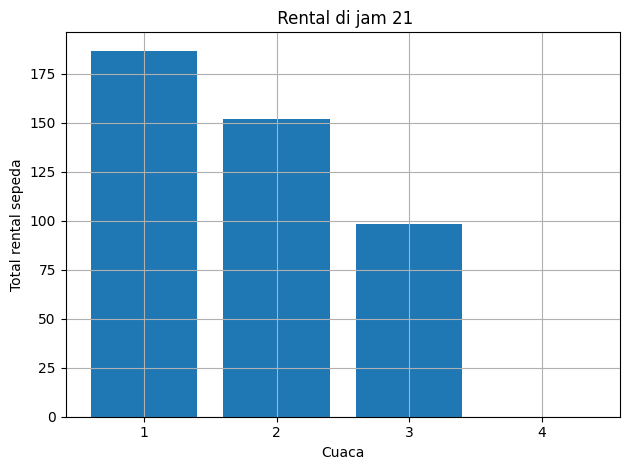

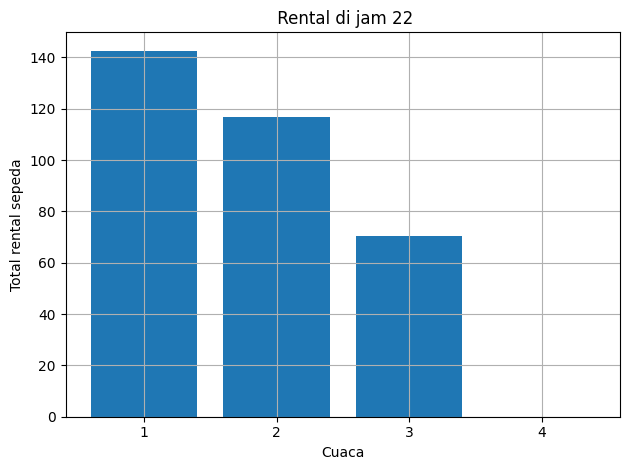

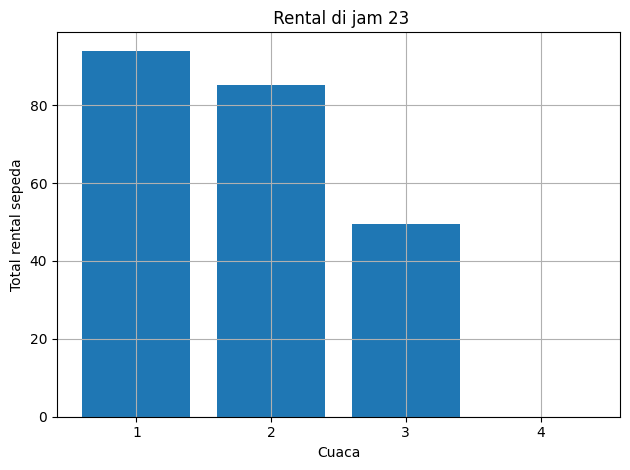

In [193]:
# months_order = [ "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
weathersit = ["1", "2", "3", "4"]
hour_df_weather = hour_df.groupby(by=["hr", "weathersit"]).agg({"cnt": "mean"}).reset_index()
for x in range(24):
  hourly_data = hour_df_weather[hour_df_weather["hr"] == x].cnt.to_list()
  for i in range(4):
    if len(hourly_data) < 4:
      hourly_data.append(0)
  plt.bar(weathersit, height=hourly_data)

  plt.title(f" Rental di jam {x}")
  plt.xlabel("Cuaca")
  plt.ylabel("Total rental sepeda")
  plt.grid(True)

  plt.tight_layout()
  plt.show()

**Insight:**
- Terilhat hasil grafik saat rental sepeda paling ramai digunakan

## Analisis Lanjutan (Opsional)

## Conclusion

1. Grafik pertama menunjukkan rental sepeda yang paling ramai berdasarkan hari yaitu :

- Rata-rata rental sepeda paling ramai oleh perental sepeda "casual" adalah di hari sabtu
- Rata-rata rental sepeda paling ramai oleh perental sepeda "registered" adalah di hari kamis
- Rata-rata rental sepeda paling ramai oleh total perental sepeda "cnt" adalah di hari jumat

2. Grafik kedua menunjukkan rata-rata rental sepeda paling ramai berdasarkan hari dan bulan oleh total perental sepeda "cnt". Rata-rata rental sepeda paling ramai terjadi pada hari sabtu di bulan september

3. Grafik ketiga menunjukkan rata-rata rental sepeda paling ramai pada pukul 17.00

4. Grafik keempat menunjukkan rata-rata rental sepeda paling banyak berdasarkan jam dan cuaca. Rata-rata rental sepeda paling ramai terjadi pada jam 17.00 di cuaca "clear".